## Background

---

<div class="alert alert-block alert-info">
<b>Stages in Building LLM from scratch</b> 
<p>   

Below are the stages of building LLM from scratch


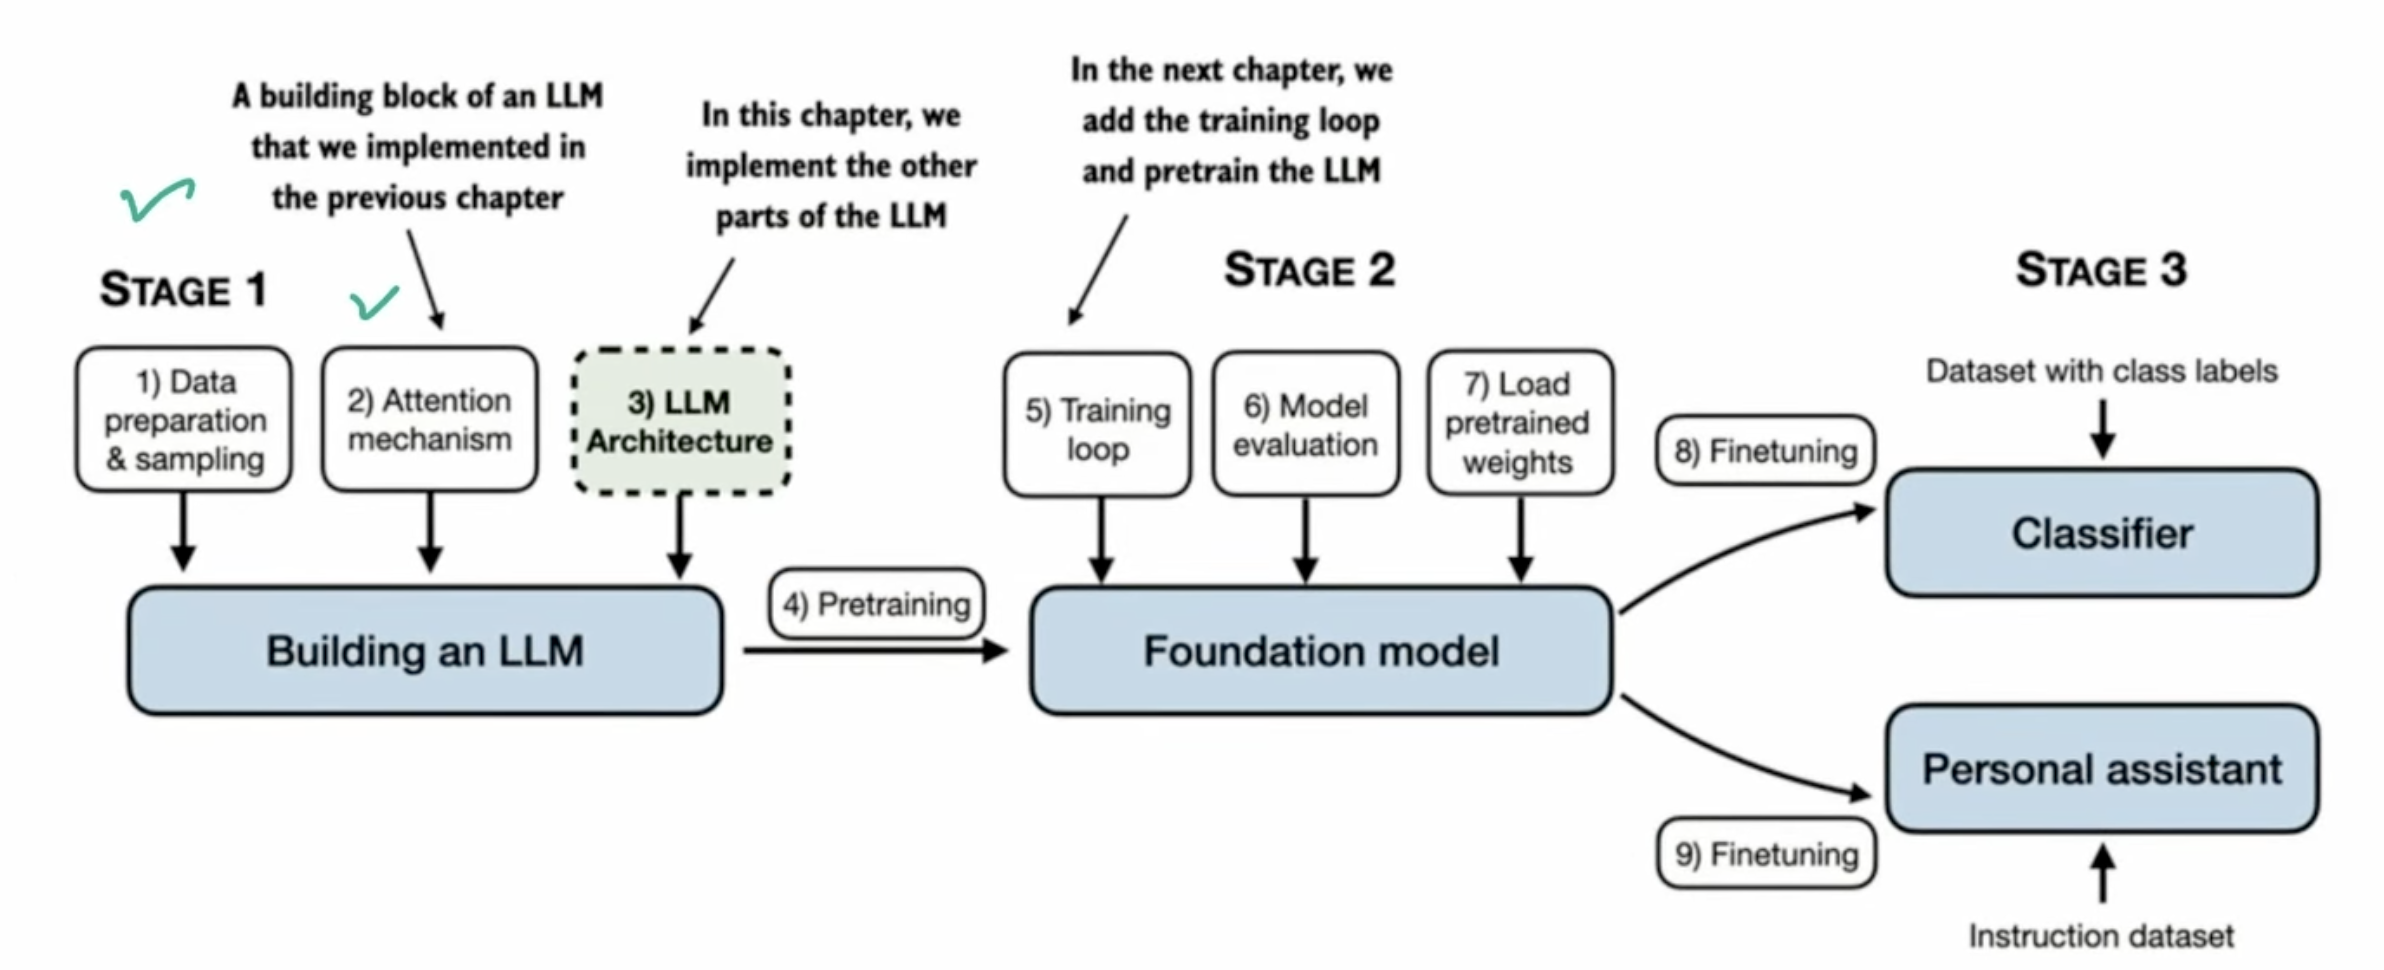



</p>
</div>





<div class="alert alert-block alert-info">
<b>Lets See the flow and building blocks of the LLM</b> 
<p>   

As your see from below the sequence

1. We give input sequence (E.g "Every efforts moves you")
2. Then we <font color=blue> tokenize </font> this input sequence using <font color=blue> Byte-Pair Encoding algorithm </font>
3. This Tokenized input is converted into <font color=blue> Embedded Vector + Positional Embedding Vector </font>
4. This Embedding vectors is then converted using <font color=blue> Context Vectors </font> with the help of <font color=blue> Masked multi-head Attention </font>
5. These Context Vector are <font color=blue> enriched vector </font> that contains semantic and details of how the token is related to other tokens in input sequence walong with the Weightable
6. Next comes the <font color=blue> Transformer Block </font> . This is the most important part of LLm architecture
7. The <font color=blue> output from transformer </font> is then decoded to predict the next word
   

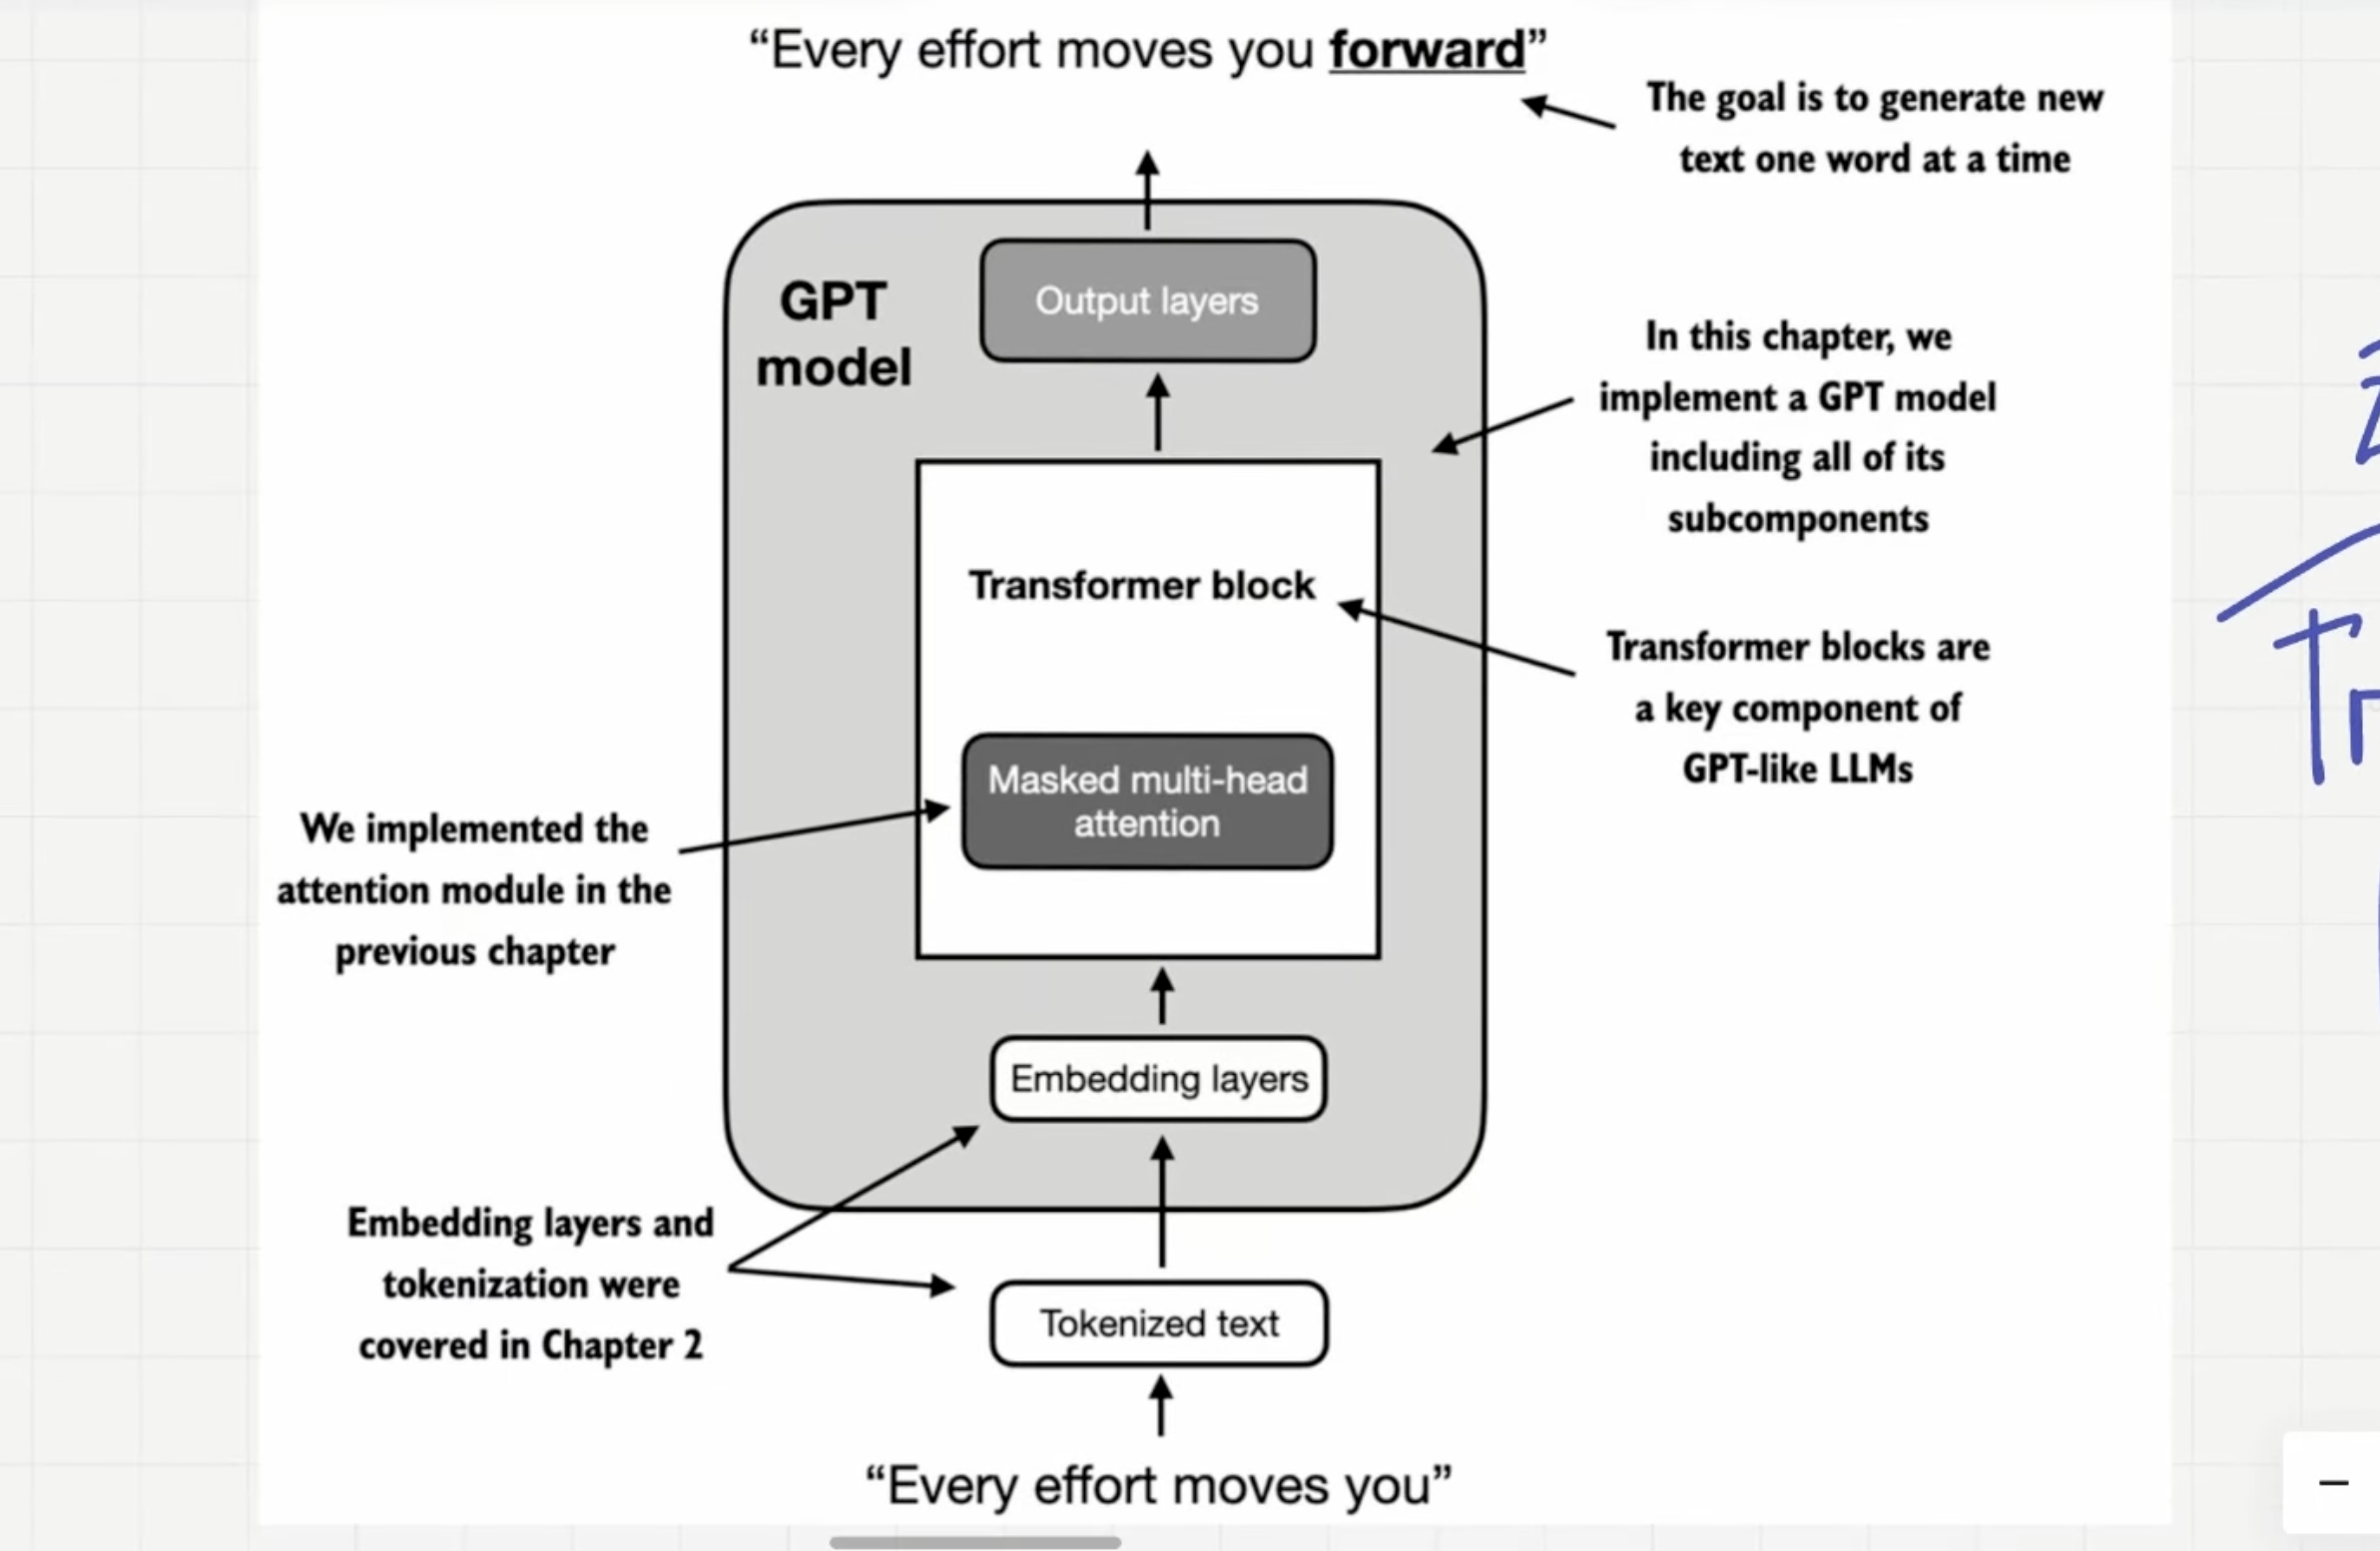



</p>
</div>




In [1]:
# Lets define the confoguration for GPT Model
# We planning to build the GPT Model with 124M parameters. This is the small GPT version

GPT_CONFIG_124M = {
  "vocab_size"     : 50257, # BPE encoding has the vocab size of 50257
  "context_length" : 1024,  # number of token we can look at ones to predict new word
  "emb_dim"        : 768,   # The Toekn Embedding dimension
  "n_heads"        : 12,    # number of attention heads
  "n_layers"       : 12,    # Number of layers (Transformer blocks)
  "drop_rate"      : 0.1,   # Dropout Rate
  "qkv_bias"       : False  # Quert-Key-Value Bias
}

### GPT ARCHITECTURE : Dummy GPT MODEL CLASS

In [2]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"] , cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"] , cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])

        # this is the layer to convert the vector output to Logits vector 
        # of size batch * Context length * vocab_size
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size , seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx) # Embedd the tokesn to higher dimensional space
        pos_embeds = self.pos_emb(torch.arange(seq_len,device=in_idx.device)) # get Pos Embedding
        x=tok_embeds + pos_embeds # Combine the Token Embeds with its position embeds
        x=self.drop_emb(x)   # Perform Droput 
        x=self.trf_blocks(x)
        x= self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [3]:
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


In [4]:
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

---

# Part 3 : GELU and FeedForawrd Layer

# `IMPLEMEMNTING GELU and FeedForward network from the transformer block`

<div class="alert alert-block alert-info">
<b>Norm Layer </b> 
<p>   

As seen in the image below (the detailed transformation block), we will not code and implement the NormLayer1 component in the transformer block
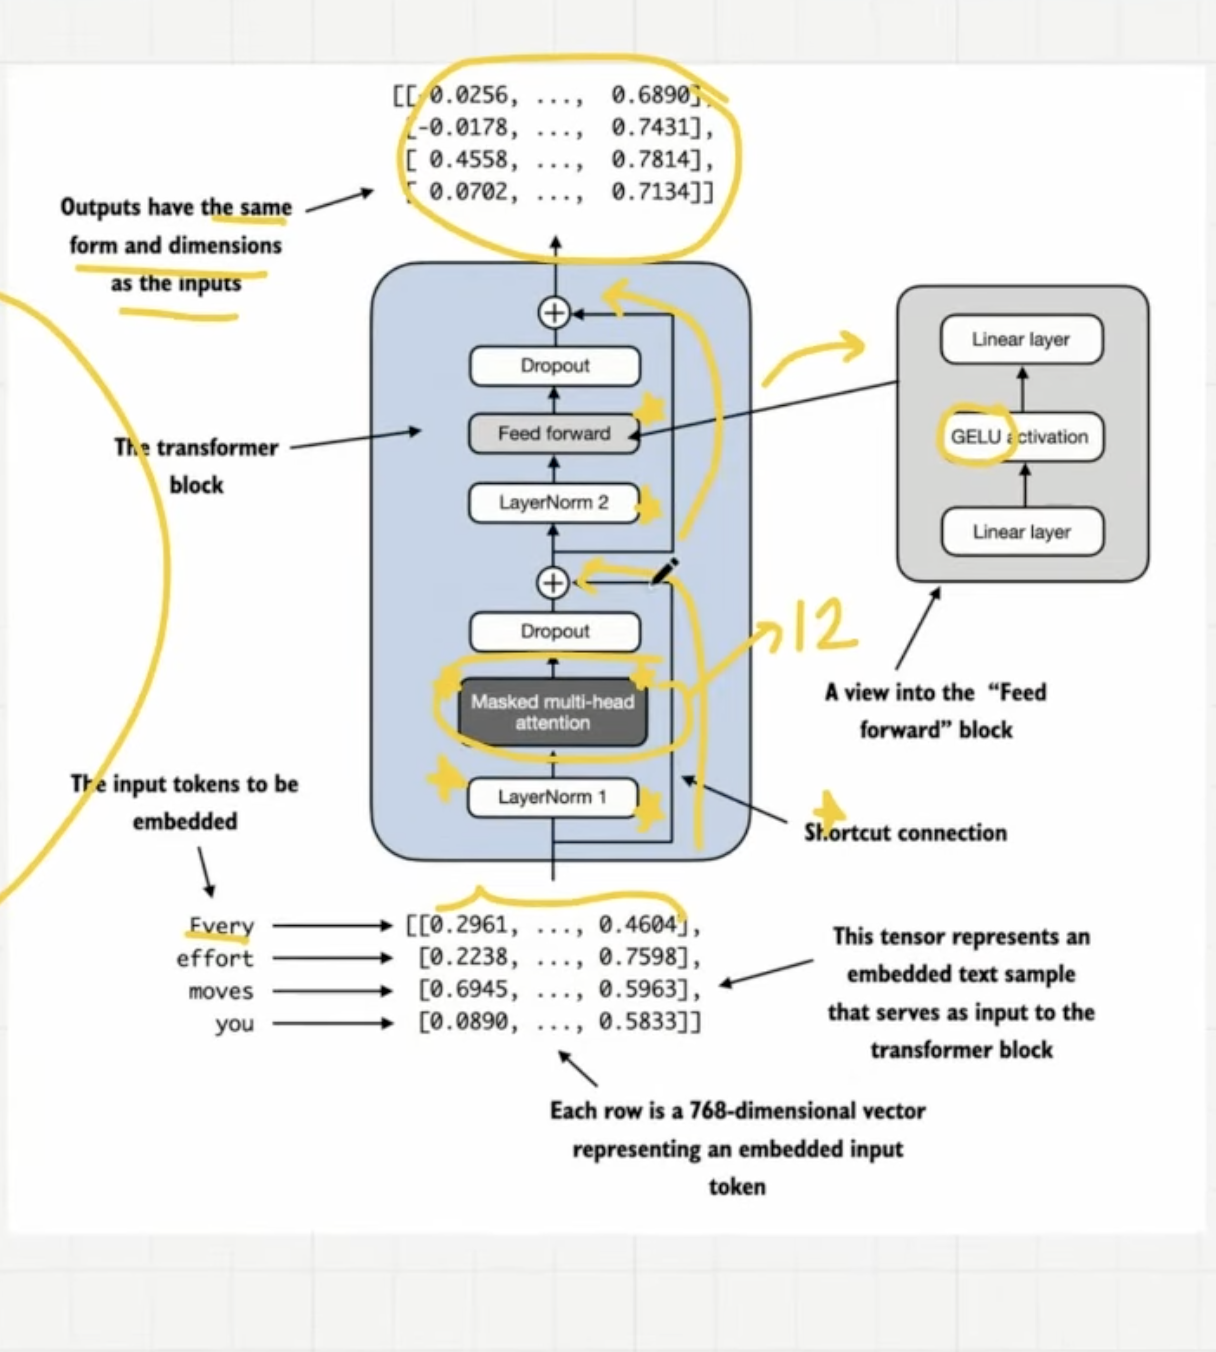

</p>
</div>



---

<div class="alert alert-block alert-info">
<b>what is Gelu</b> 
<p>   

GELU = Gaussian Error Linear Unit
In Neural Network the activation function used most commonly is ReLU=  Recified Linear Unit . 

This has many benefits over sigmoid function. The major advantage of using ReLU over SIGMOID is it address the vanishing gradient problem.

ReLU = fx = max(0,x) :- meaning id value of input is negative  it will give 0 else the value of x iself is returned

<b>Problem with Relu</b> 
RELU comes with a problem called as "dying ReLU problem" , meaning If the neurosn weights are updated in a way that its input is always negative  , the neuron will always output zero and its gradient will also be zero.

This means the neuron stops learning and it almost equal to dead , called "DEAD NEURON PROBLEM"

<b> Why use  GELU </b> 

GELU (Gaussian Error Linear Unit ) has the smooth curve and even for the value that are negative , the neron keeps learning and does not equal to zero like ReLU. These values also contribute to the overall learning on NN.

GELU is a smoother and more sophisticated activation functions . It is movitated by the idea of combining the properties of ReLU and dropout (a regularizatin technique).

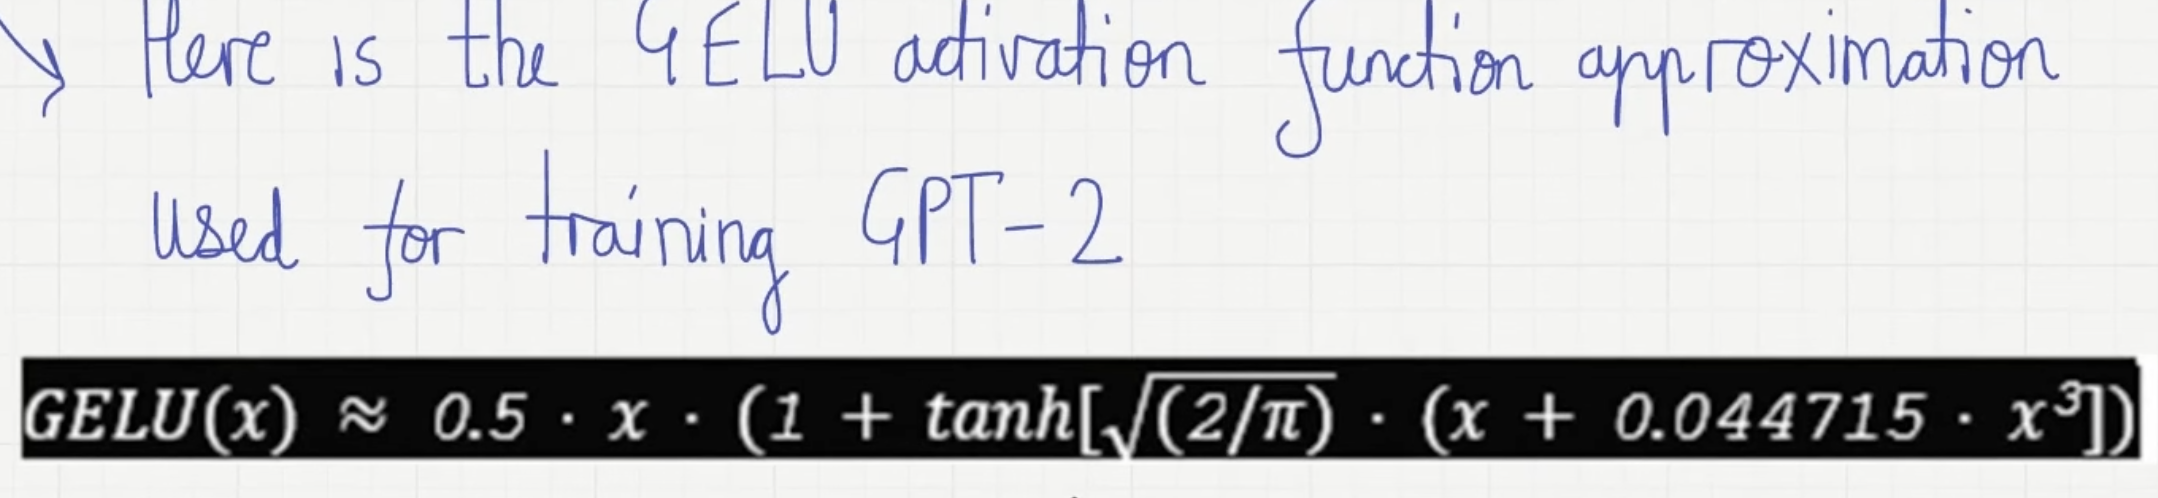

GELU is cumulative distribution function of the standard normal distribution.

GELU is smooth , non-monotonic function . Unlike ReLU it does not have a sharp cutoff at zero.

Lets look at the plot of both the activation functions

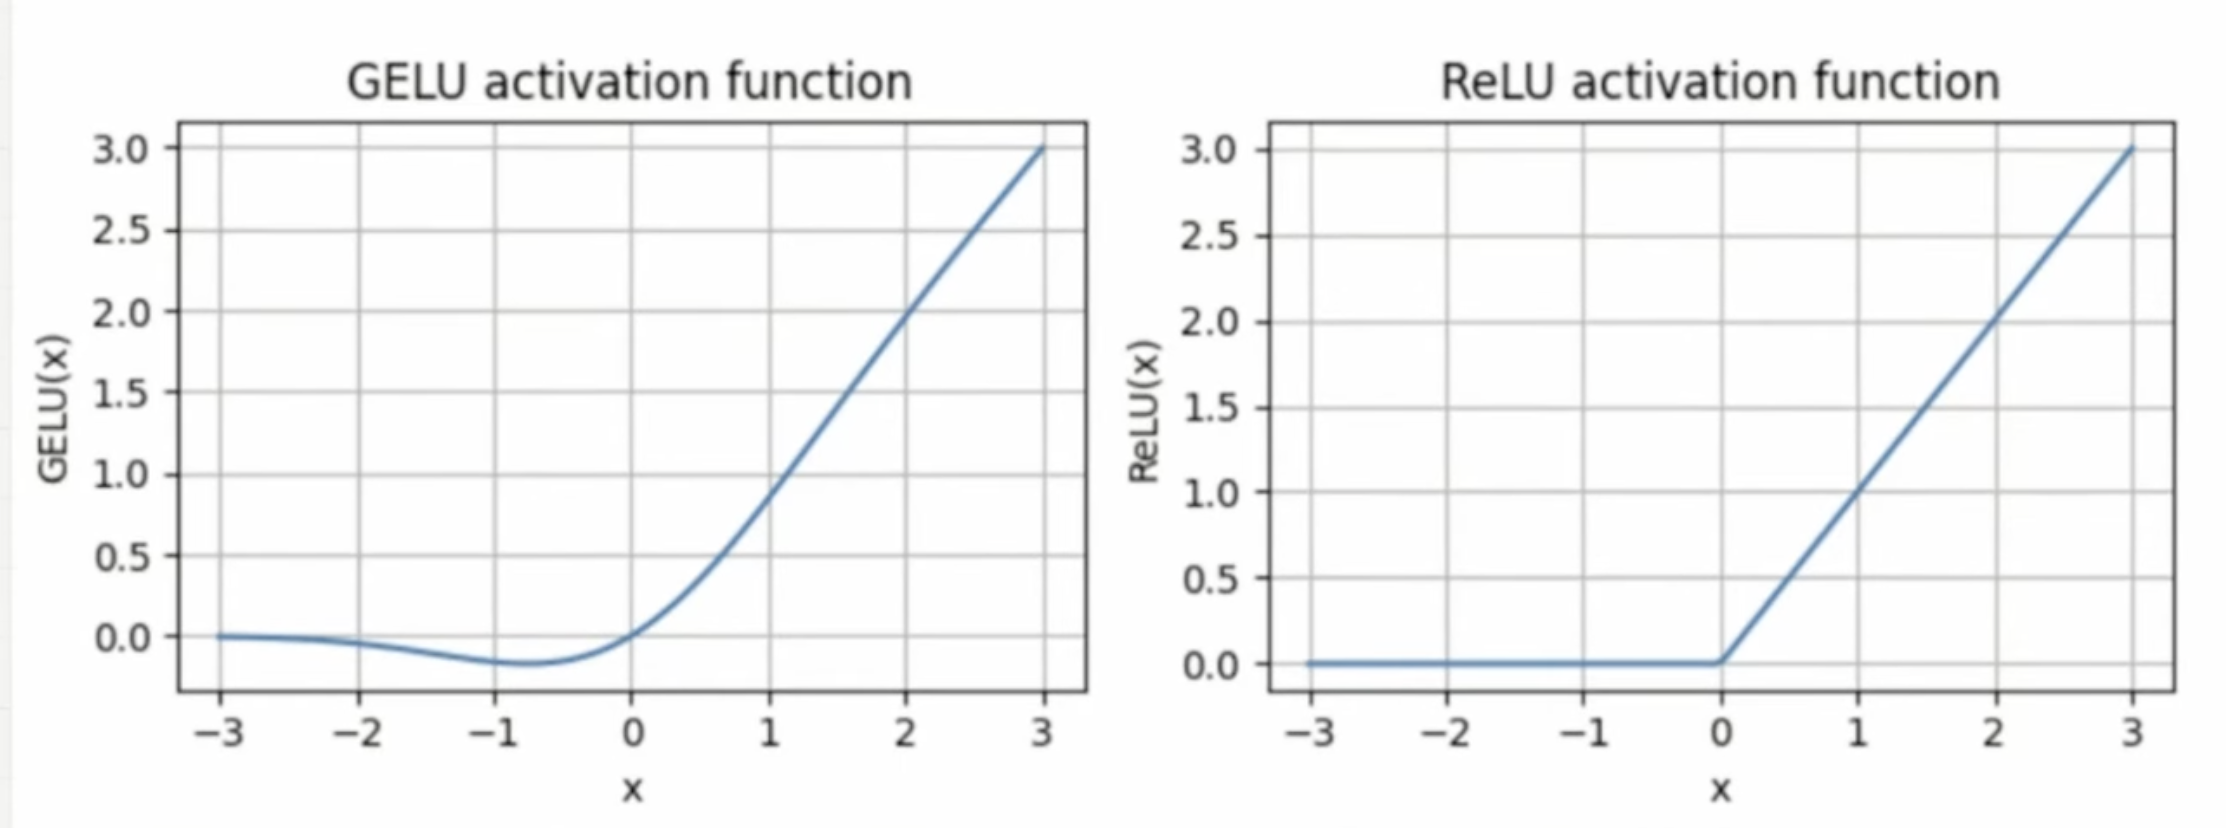

</p>

</div>

---

<div class="alert alert-block alert-info">
<b>Lets Implement GELU activation function </b> 
<p>   

</p>
</div>

In [5]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self,x):
        activation = 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x,3))
        ))

        return activation

In [6]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

<div class="alert alert-block alert-warning">

The smoothness of GELU, as shown in the above figure, can lead to better optimization properties
during training, as it allows for more nuanced adjustments to the model's parameters. 

In contrast, ReLU has a sharp corner at zero, which can sometimes make optimization harder,
especially in networks that are very deep or have complex architectures. 

Moreover, unlike RELU, which outputs zero for any negative input, GELU allows for a small, non-zero output
for negative values. 

This characteristic means that during the training process, neurons that
receive negative input can still contribute to the learning process, albeit to a lesser extent
than positive inputs.

</div>

<div class="alert alert-block alert-info">
<b>Let build the Feed Forward Neural Network</b> 
<p>

</p>

 </div>

<div class="alert alert-block alert-success">

Next, let's use the GELU function to implement the small neural network module,
FeedForward, that we will be using in the LLM's transformer block later:
</div>

<div class="alert alert-block alert-info">
<b>Feed Forward Nueral network Structure </b> 
<p>   

This is the structure of feed forward neural network structure.
It starts from the bottom and goes upto the top .

This is also called as contraction and expansion nueral network , where we started with initial dimension (in this case it is 768) and expand it by 4 times and then contract it back to the same dimensions

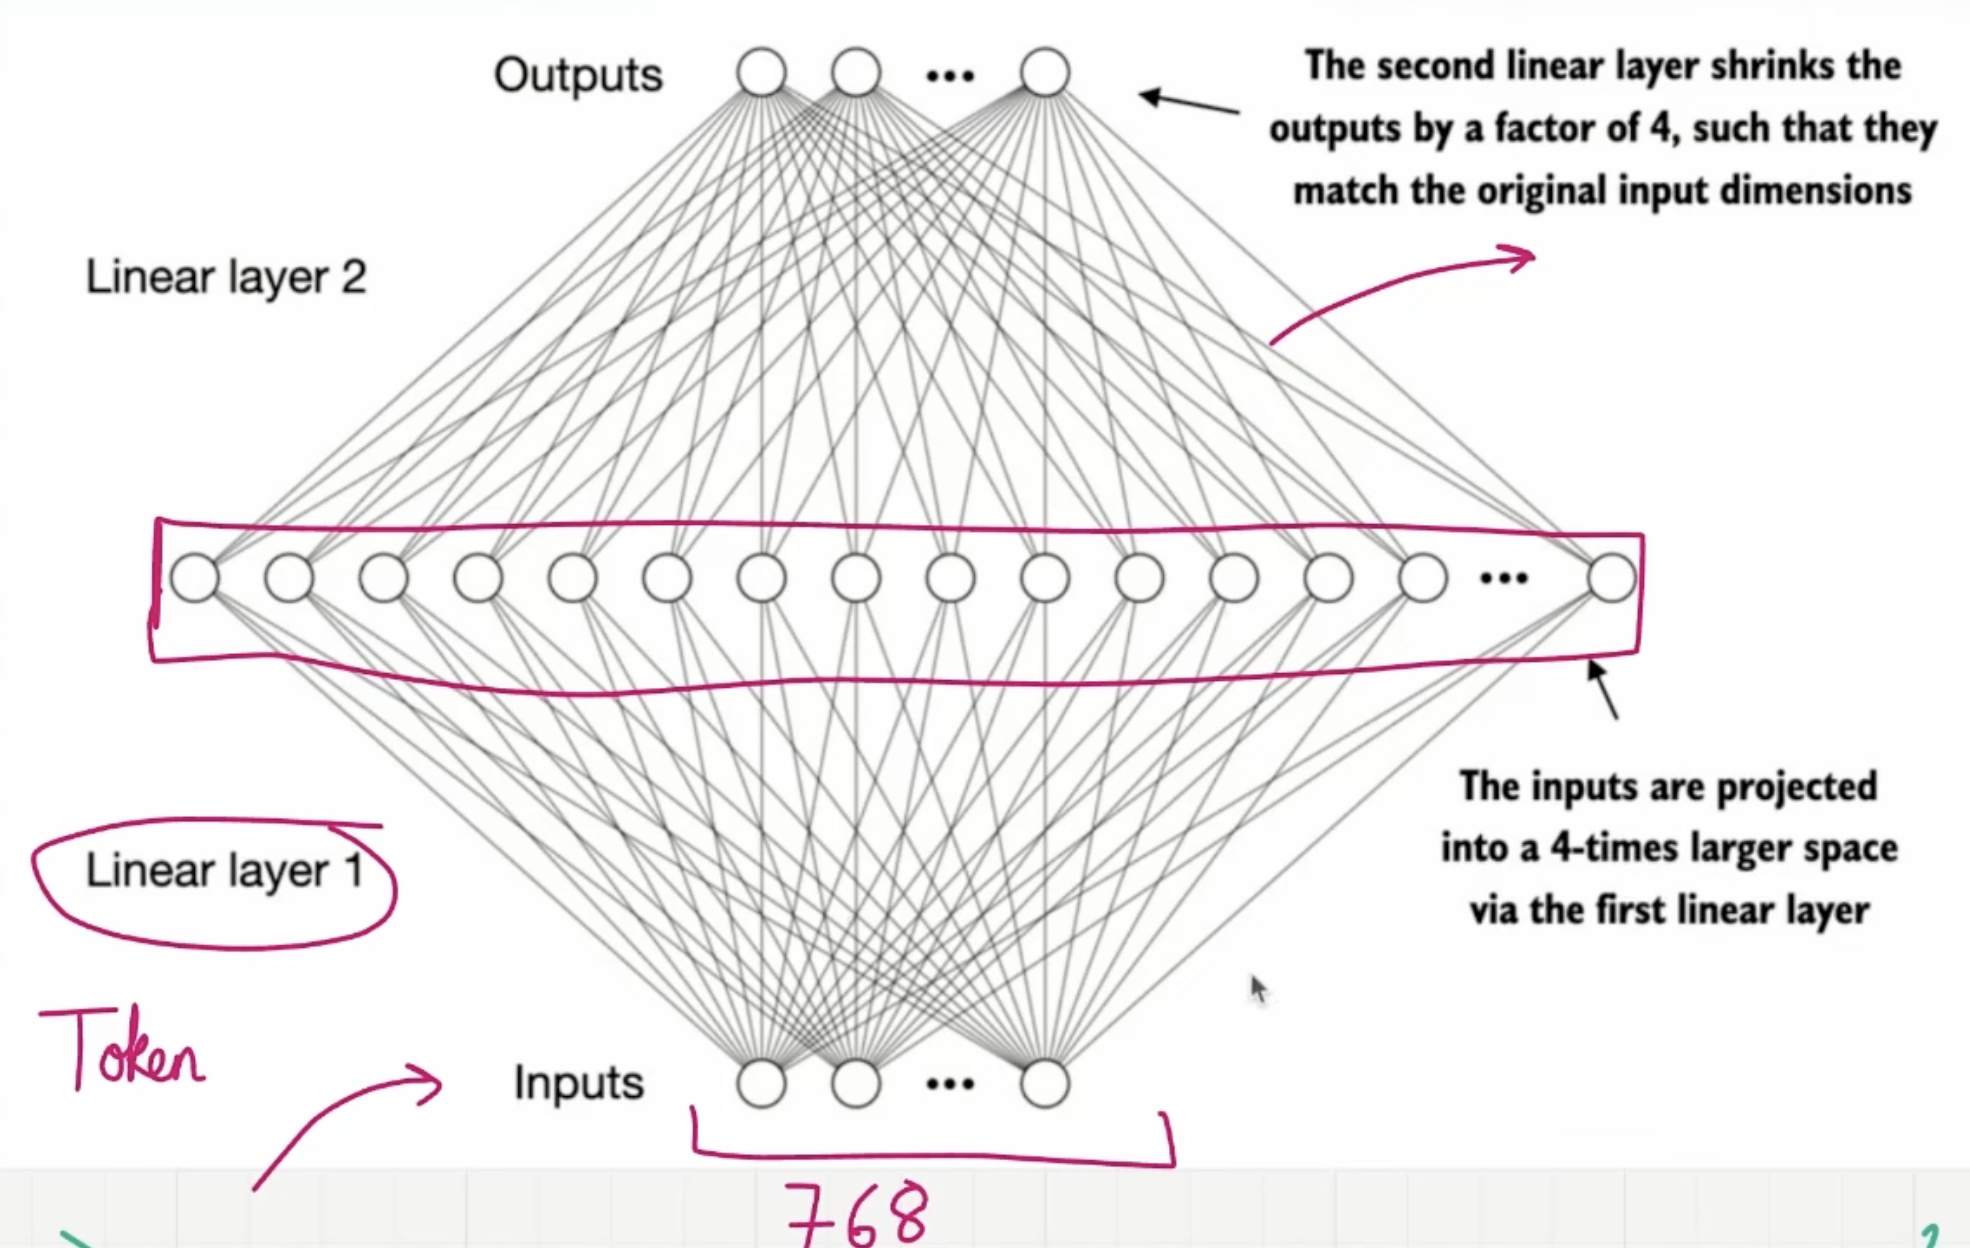

<b> This is how it goes in simpler terms </b>

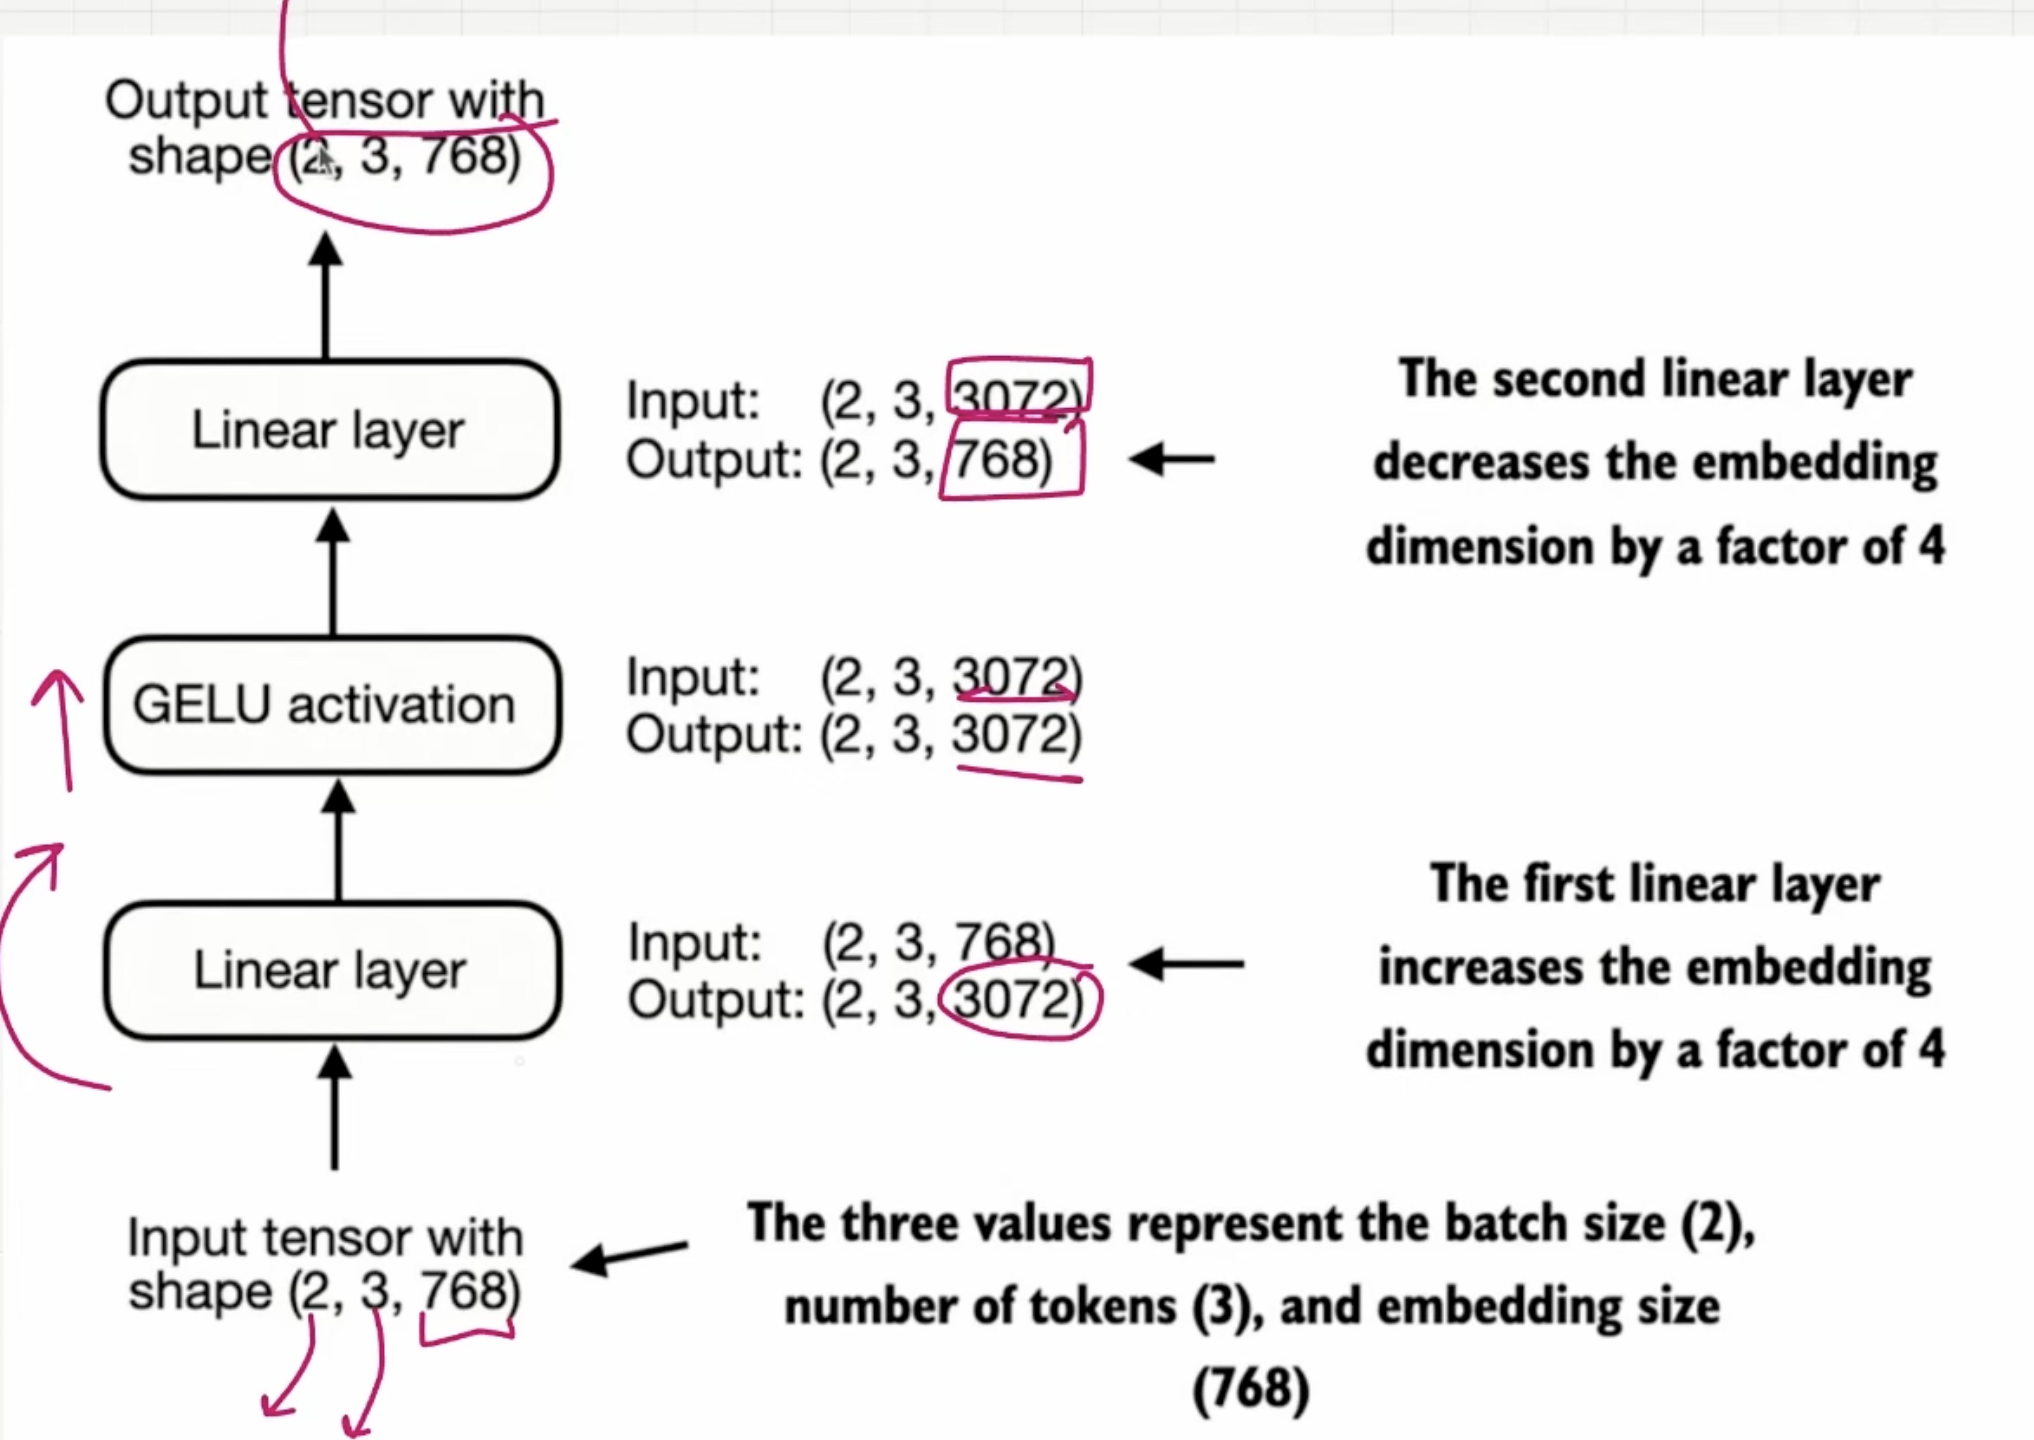

</p>
</div>



In [16]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), # Define 1st layer with input and o/p size . Expansion
            GELU(),                                        # Define the Activation function
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), # define the final layer . Contraction
        )

    def forward(self, x):
        return self.layers(x)
    

<div class="alert alert-block alert-info">

As we can see in the preceding code, the FeedForward module is a small neural network
consisting of two Linear layers and a GELU activation function. 

In the 124 million parameter GPT model, it receives the input batches with tokens that have an embedding
size of 768 each via the GPT_CONFIG_124M dictionary where GPT_CONFIG_124M["emb_dim"]
= 768.
</div>

In [17]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


<div class="alert alert-block alert-warning">

The FeedForward module we implemented in this section plays a crucial role in enhancing
the model's ability to learn from and generalize the data. 


Although the input and output dimensions of this module are the same, it internally expands the embedding dimension
into a higher-dimensional space through the first linear layer.

This expansion is followed by a non-linear GELU activation, and then a contraction back to
the original dimension with the second linear transformation. 

Such a design allows for the
exploration of a richer representation space.

</div>